In [1]:
import tensorflow as tf, numpy as np, matplotlib.pyplot as plt
plt.style.use('ggplot')

### LAB
1. 設定4個變數: varA, varB, varC, varY,
2. 根據 target function y = 4(x^2) + 8x + 7, 在tensorflow graph裡設定與target function一樣格式的formula
3. 使用 mean square loss function
4. 執行時有個重要的變數沒有run, 導致無法最佳化, 請問是哪一個變數?

```
目標: varA 逼近 4, varB 逼近 8, varC 逼近 7```

## target function<br/>
$ Y = 4X^2 + 8X + 7 $

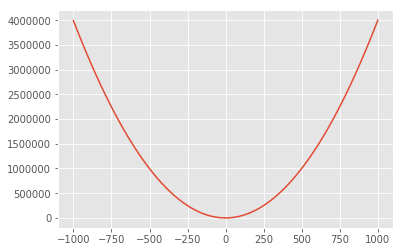

In [2]:
fn = lambda x: 4*x**2 + 8*x + 7
x = np.arange(-1000, 1000)
plt.plot(x, fn(x))
plt.show()

In [ ]:
import tensorflow as tf, numpy as np

class SquaredModel(object):
    def __init__(self):
        """Init graph"""
        tf.reset_default_graph()
        self.graph = tf.Graph()
        with self.graph.as_default():
            with tf.variable_scope("inputs"):
                # 接收 outerX data
                self.placeholderX = tf.placeholder(tf.float32, shape=[None], name="placeholder_x")
                # 接收 outerY data
                self.placeholderY = tf.placeholder(tf.float32, shape=[None], name="placeholder_y")

            with tf.variable_scope("formula"):
                # 設定4個變數 ex: self.varA = tf.Variable(tf.random_uniform(shape=[1]), tf.float32)
                self.varA = ?
                self.varB = ?
                self.varC = ?
                # y = 4(x^2) + 8x + 7
                self.varY = ? * self.placeholderX ** 2 + \
                            ? * self.placeholderX + \
                            ?
                # tensorboard weights logs
                tf.summary.histogram("varA", self.varA)
                tf.summary.histogram("varB", self.varB)
                tf.summary.histogram("varC", self.varC)
                
            # 均方誤差
            self.loss = tf.losses.mean_squared_error(self.placeholderY, self.varY)
            # tensorboard weights logs
            tf.summary.scalar("loss", self.loss)
            # 使用 AdamOptimizer
            self.optimizer = tf.train.GradientDescentOptimizer(learning_rate=learning_rate)
            # 最小化 loss, 此時會 backpropagation 去調整 varW, varB的值
            self.trainer = self.optimizer.minimize(self.loss)
            self.merge = tf.summary.merge_all()
            # 儲存物件
            self.saver = tf.train.Saver(tf.global_variables())
            
    def load_weight(self, sess, model_dir):
        """load latest saved model"""
        latestCkpt = tf.train.latest_checkpoint(model_dir)
        if latestCkpt:
            self.saver.restore(sess, latestCkpt)
            print("load weight success!")
        return latestCkpt

## Save Model

In [ ]:
n_epoch = 2000
learning_rate = 0.5

# 產生資料
outerX = np.random.random(10000)
outerY = 4 * (outerX ** 2) + 8 * outerX + 7 + np.random.random()
outerX, outerY

model_dir = "./model/squared"

model = SquaredModel()
with tf.Session(graph=model.graph) as sess:
    w = tf.summary.FileWriter(model_dir, sess.graph)
    init = tf.global_variables_initializer()
    sess.run(init)
    for i in range(n_epoch):
        _, a_, b_, c_, merge_= sess.run([?, model.varA, model.varB, model.varC, model.merge], 
                                        feed_dict={model.placeholderX: outerX, model.placeholderY: outerY})
        if (i+1) % 200 == 0:
            print('step: {} varA: {}, varB: {}, varC: {}'.format(i+1, a_, b_, c_) )
            w.add_summary(merge_, i)
            
        # 200 epochs 存檔一次
        if (i+1) % 200 == 0:
            ''' Save model '''
            model.saver.save(sess, save_path=model_dir + "/squared_model", global_step=i)

## Load Model

In [ ]:
model_dir = "./model/squared"
data_x = np.linspace(-1000, 1000, 100)

model = SquaredModel()
with tf.Session(graph=model.graph) as sess:
    sess.run(tf.global_variables_initializer())
    ''' load pre-trained weight into model '''
    # model.load_weight(sess, model_dir)
    
    y = sess.run(model.varY, feed_dict={model.placeholderX: data_x})
    
    ans_y = lambda x: 4 * x**2 + 8 * x + 7
    plt.scatter(data_x, y, label="predict", c="b", linewidth=5, alpha=0.5)
    plt.scatter(data_x, ans_y(data_x), label="predict", c="g")
    plt.legend(loc="best")
    plt.show()